# Logistic regression with genomic data
## Introduction

this is the companion colab code for my tutorial in medium about Logistic regression in Python with genomic data, please read the article for better understanding of the code. In the article I discuss about the theory, the hyperparameters, how to efficiently use the techniques. Here I am providing just generic information about the algorithm and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about logistic regression math](https://)

[Medium article about hyperparameter, training, evaluation](https://)

note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

## Dataset preparation

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#dataset
data = pd.read_table("/content/gdrive/My Drive/aml/201028_GSE122505_Leukemia_clean.txt", sep = "\t")
#table of the disease
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [ ]:
#removing some disease type
data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]

In [ ]:
selected = ['AML','ALL']
data = data[data.disease.isin(selected)]
data.disease.value_counts()

AML    969
ALL    906
Name: disease, dtype: int64

In [ ]:
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape


(1875, 4252)

## Training of the model

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='saga', random_state=1)
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.classes_

array(['ALL', 'AML'], dtype=object)

In [ ]:
model.intercept_, model.coef_ #feature importance

(array([0.01356026]),
 array([[-0.01072273, -0.01072273,  0.00769251, ..., -0.00790833,
         -0.00208754,  0.00662061]]))

In [ ]:
model.predict_proba(X_test)[0:10]

array([[1.33946531e-04, 9.99866053e-01],
       [9.99918644e-01, 8.13563252e-05],
       [9.99988370e-01, 1.16302945e-05],
       [1.09509319e-01, 8.90490681e-01],
       [9.99089244e-01, 9.10755841e-04],
       [2.82731690e-05, 9.99971727e-01],
       [2.00374240e-04, 9.99799626e-01],
       [6.02902581e-05, 9.99939710e-01],
       [1.17337005e-05, 9.99988266e-01],
       [1.32207784e-02, 9.86779222e-01]])

In [ ]:
model.predict(X_test)[0:10]

array(['AML', 'ALL', 'ALL', 'AML', 'ALL', 'AML', 'AML', 'AML', 'AML',
       'AML'], dtype=object)

In [ ]:
y_test[0:10]

2086    AML
330     ALL
1748    ALL
85      AML
1788    ALL
2027    AML
1931    AML
18      AML
2172    AML
53      AML
Name: disease, dtype: object

## Model evaluation

In [ ]:
model.score(X_train, y_train)
model.score(X_test, y_test)

1.0

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[221,   0],
       [  0, 248]])

Text(0.5, 12.5, 'Predicted label')

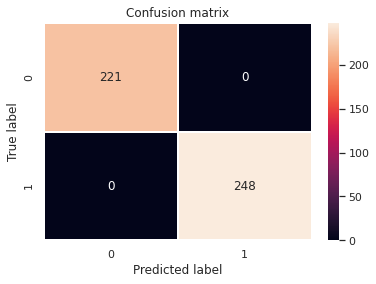

In [ ]:
import seaborn as sns; sns.set_theme()
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=1)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### predicting if a patient is high MYC or low MYC expression

No handles with labels found to put in legend.


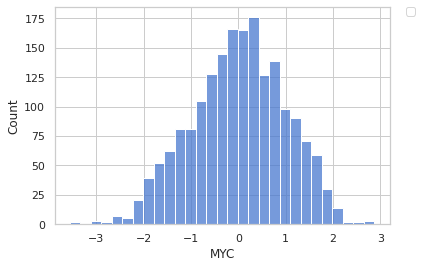

In [ ]:
X = df.drop("MYC", 1)
y = df["MYC"]
sns.set(style="whitegrid", palette="muted")
sns.histplot(data=y, x=y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
y = np.where(y < 0, 0, 1)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 909]
 [  1 966]]


In [ ]:
#fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(solver='saga', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[144,  35],
       [ 34, 162]])

Text(0.5, 12.5, 'Predicted label')

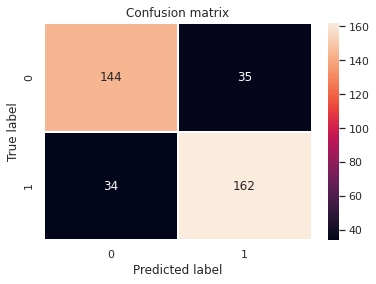

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=1)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Evaluation metrics

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("sensitivity:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.816
Precision: 0.8223350253807107
sensitivity: 0.826530612244898
F1 score: 0.8244274809160306


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.8044692737430168

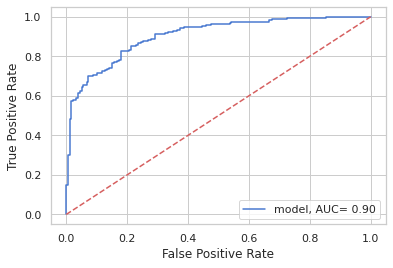

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="model, AUC= %0.2f" %auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()